## 데이터 로드 및 구조 훑어 보기

In [2]:
from pathlib import Path
from zlib import crc32

import pandas as pd
from pandas.plotting import scatter_matrix
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import koreanize_matplotlib
import matplotlib.image as mpimg

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

import geopandas as gpd
import contextily as ctx

from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

In [3]:
housing = pd.read_csv(Path("datasets/yeolip_housing.csv"), encoding="UTF-8-SIG")
housing = housing[['자치구명','읍면동명','건물면적', '토지면적', '층', '건축년도', '경도', '위도', '월평균소득', '동별세대수', '동별세대당인구', '20세미만인구', '20세이상인구','주택가격(만원)']]
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1217 entries, 0 to 1216
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   자치구명      1217 non-null   object 
 1   읍면동명      1217 non-null   object 
 2   건물면적      1217 non-null   float64
 3   토지면적      1217 non-null   float64
 4   층         1217 non-null   float64
 5   건축년도      1217 non-null   float64
 6   경도        1168 non-null   float64
 7   위도        1168 non-null   float64
 8   월평균소득     1217 non-null   float64
 9   동별세대수     1217 non-null   int64  
 10  동별세대당인구   1217 non-null   float64
 11  20세미만인구   1217 non-null   int64  
 12  20세이상인구   1217 non-null   int64  
 13  주택가격(만원)  1217 non-null   int64  
dtypes: float64(8), int64(4), object(2)
memory usage: 133.2+ KB


In [4]:
housing.head()

,자치구명,읍면동명,건물면적,토지면적,층,건축년도,경도,위도,월평균소득,동별세대수,동별세대당인구,20세미만인구,20세이상인구,주택가격(만원)
0,중랑구,면목제2동,29.230,18.0,6.0,2022.0,127.084763,37.583802,2322173.0,12138,1.91,10715,119617,41000
1,강북구,삼양동,15.885,13.0,5.0,2015.0,127.026647,37.633145,2473211.0,11616,2.09,13101,111124,9050
2,마포구,아현동,53.190,31.0,4.0,1994.0,126.961275,37.547561,5237419.0,12370,2.35,2902,22186,46000
3,강서구,공항동,58.460,30.0,3.0,2002.0,126.810944,37.569193,2896818.0,13889,2.11,5459,54460,29800
4,광진구,중곡제1동,52.540,21.0,4.0,1993.0,127.087744,37.569262,2542359.0,8672,1.74,5978,70958,20000


In [5]:
housing.describe()

,건물면적,토지면적,층,건축년도,경도,위도,월평균소득,동별세대수,동별세대당인구,20세미만인구,20세이상인구,주택가격(만원)
count,1217.000000,1217.000000,1217.000000,1217.000000,1168.000000,1168.000000,1.217000e+03,1217.000000,1217.000000,1217.000000,1217.000000,1217.000000
mean,43.161388,25.800329,3.209532,2009.906327,126.974691,37.556390,3.055529e+06,13248.996713,2.030263,8945.902219,79301.228431,30035.460148
std,15.466055,17.808661,1.989605,11.429177,0.093554,0.052391,8.807253e+05,5458.757470,0.350401,6414.169886,56965.981338,11492.753060
min,8.480000,3.000000,-1.000000,1974.000000,126.809606,37.441025,2.220463e+06,1103.000000,1.340000,38.000000,868.000000,5300.000000
25%,29.860000,18.000000,2.000000,2002.000000,126.907229,37.516807,2.473211e+06,9795.000000,1.790000,4286.000000,38114.000000,22000.000000
50%,41.950000,24.000000,3.000000,2014.000000,126.954271,37.551163,2.805757e+06,11982.000000,1.940000,7930.000000,67167.000000,29150.000000
75%,53.880000,31.000000,4.000000,2018.000000,127.050550,37.600705,3.341356e+06,15455.000000,2.170000,11946.000000,101057.000000,37500.000000
max,111.920000,473.000000,16.000000,2025.000000,127.170147,37.685787,7.421305e+06,27977.000000,3.310000,25771.000000,223346.000000,64400.000000


In [6]:
# 추가 코드 - 고해상도 PNG 파일로 그래프를 저장하기 위한 코드
# https://github.com/rickiepark/handson-ml3/blob/main/02_end_to_end_machine_learning_project.ipynb

IMAGES_PATH = Path() / "images" / "end_to_end_project"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

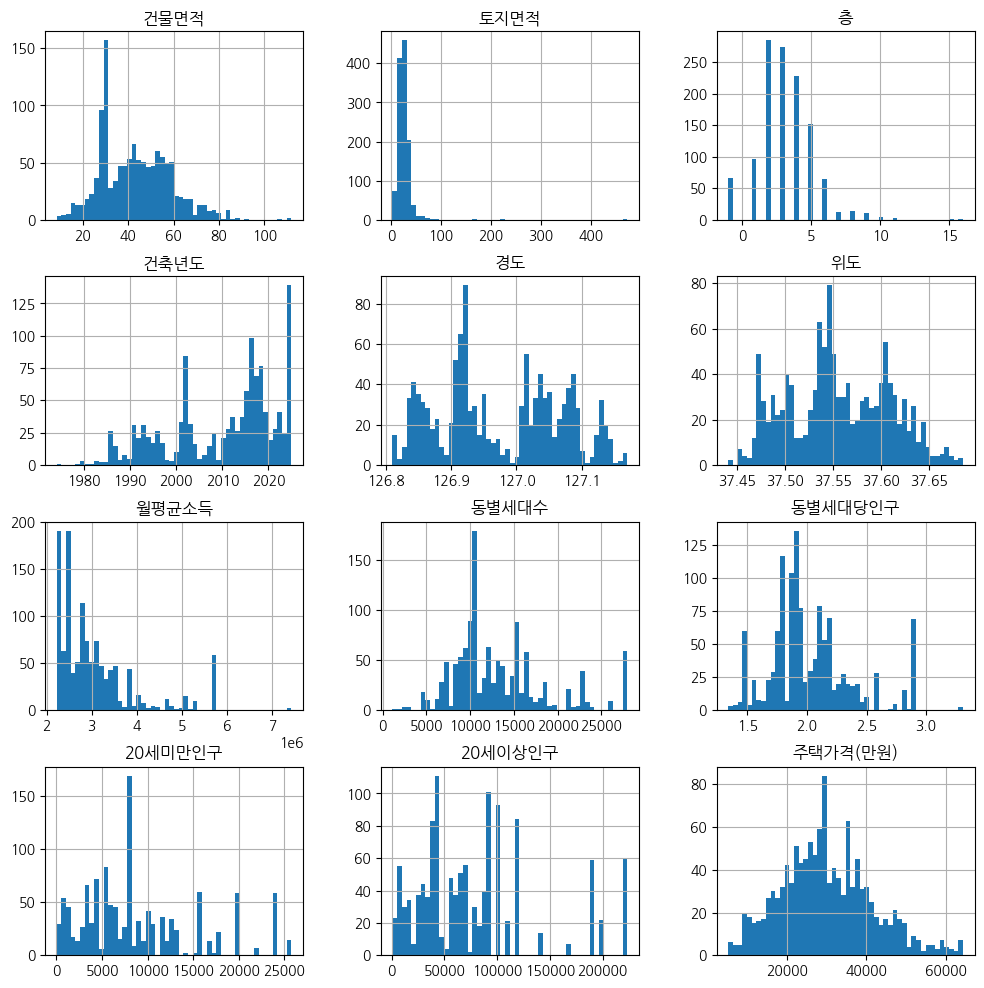

In [7]:
plt.rc('font', size=12)
plt.rc('axes', labelsize=12, titlesize=12)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

housing.hist(bins=50, figsize=(12,12))
# save_fig("hist_plot")
plt.show()

## 트레인 테스트 셋 나누기

In [8]:
# train_test_split 대신 해시함수 사용해보기
def is_id_in_test_set(id, test_ratio):
    return crc32(np.int64(id)) < test_ratio * 2**32

def split_data_with_id_hash(data, test_ratio, id_column):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_:is_id_in_test_set(id_, test_ratio))
    return data.loc[~in_test_set], data.loc[in_test_set]

In [9]:
housing_with_id = housing.reset_index()
train_set, test_set = split_data_with_id_hash(housing_with_id, 0.2, "index")

In [10]:
# train test split 함수 사용
# train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

In [11]:
(housing["월평균소득"]/10_000).describe().T

count    1217.000000
mean      305.552853
std        88.072526
min       222.046300
25%       247.321100
50%       280.575700
75%       334.135600
max       742.130500
Name: 월평균소득, dtype: float64

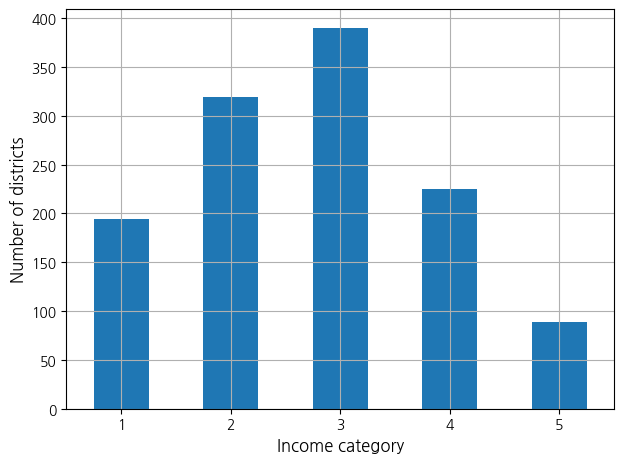

In [12]:
housing["income_cat"] = pd.cut(housing["월평균소득"],
                               bins=[0.,2_400_000,2_700_000,3_300_000,5_000_000,np.inf ],
                               labels=[1, 2, 3, 4, 5 ])

housing["income_cat"].value_counts().sort_index().plot.bar(rot=0, grid=True)
plt.xlabel("Income category")
plt.ylabel("Number of districts")
save_fig("housing_income_cat_bar_plot")
plt.show()

In [13]:
# 계층적 샘플링 방법(1)

# from sklearn.model_selection import StratifiedShuffleSplit

# splitter = StratifiedShuffleSplit(n_splits=10, test_size=0.2, random_state=42)
# strat_splits = []
# for train_index, test_index in splitter.split(housing, housing["income_cat"]):
#     strat_train_set_n = housing.iloc[train_index]
#     strat_test_set_n = housing.iloc[test_index]
#     strat_splits.append([strat_train_set_n, strat_test_set_n])
# strat_train_set, strat_test_set = strat_splits[0]

In [14]:
# 계층적 샘플링 방법(2)
strat_train_set, strat_test_set = train_test_split(
    housing, test_size=0.2, stratify=housing["income_cat"], random_state=42
)

In [15]:
# strat_test_set["income_cat"].value_counts()/len(strat_test_set)
strat_test_set["income_cat"].value_counts(normalize=True)

income_cat
3    0.319672
2    0.262295
4    0.184426
1    0.159836
5    0.073770
Name: proportion, dtype: float64

In [16]:
def income_cat_proportions(data):
    return data["income_cat"].value_counts(normalize=True)

# 계층적 샘플링을 하지 않았을 때와 비교하기 위한 랜덤 분할
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

compare_props = pd.DataFrame({
    "Overall %": income_cat_proportions(housing),
    "Stratified %": income_cat_proportions(strat_test_set),
    "Random %": income_cat_proportions(test_set),
}).sort_index()

compare_props.index.name = "Income Category"
compare_props["Strat. Error %"] = (compare_props["Stratified %"] /
                                   compare_props["Overall %"] - 1)
compare_props["Rand. Error %"] = (compare_props["Random %"] /
                                   compare_props["Overall %"] - 1)
(compare_props * 100).round(2)

,Overall %,Stratified %,Random %,Strat. Error %,Rand. Error %
Income Category,,,,,
1,15.94,15.98,16.39,0.27,2.84
2,26.21,26.23,26.23,0.07,0.07
3,32.05,31.97,31.97,-0.25,-0.25
4,18.49,18.44,17.62,-0.25,-4.68
5,7.31,7.38,7.79,0.87,6.48


## 데이터 이해를 위한 탐색과 시각화

In [17]:
housing = strat_train_set.copy()

## 지리적 데이터 시각화

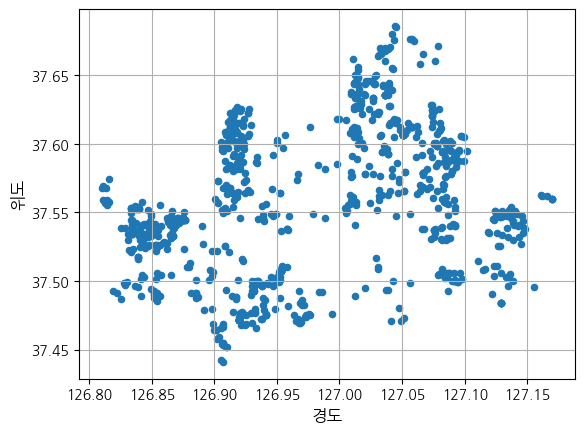

In [18]:
housing.plot(kind="scatter", x="경도", y="위도", grid = True)
plt.show()

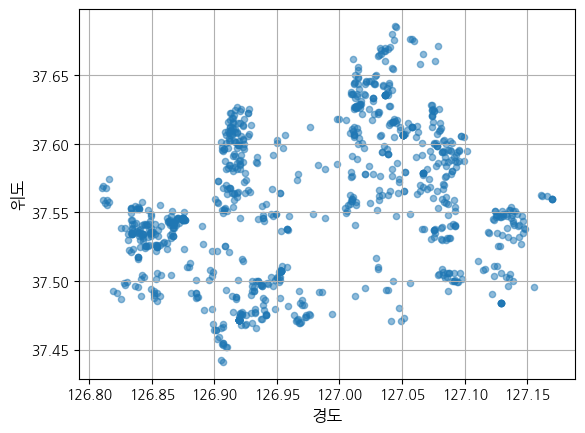

In [19]:
housing.plot(kind="scatter", x="경도", y="위도", grid = True, alpha=0.5)
plt.show()

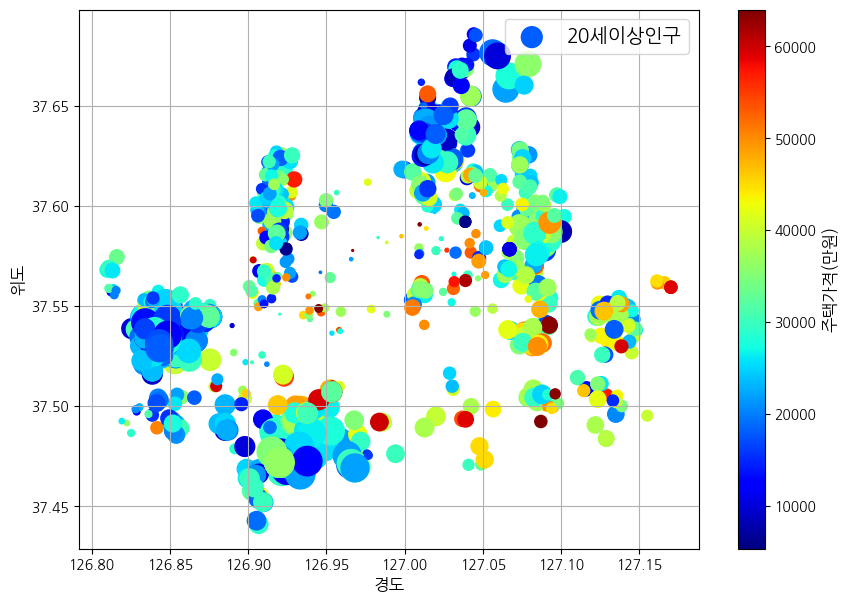

In [20]:
housing.plot(kind="scatter", x="경도", y="위도", grid=True,
             s=housing["20세이상인구"]/500, label="20세이상인구",
             c="주택가격(만원)", cmap="jet", colorbar=True,
             legend=True, figsize=(10,7))
plt.show()

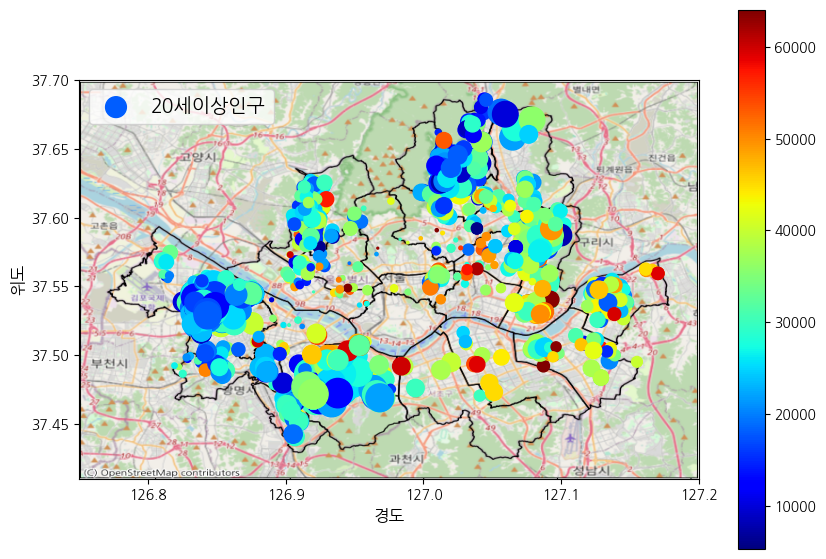

In [21]:
filename = "seoul.png"


housing.plot(
    kind="scatter", x="경도", y="위도",
    s=housing["20세이상인구"]/500, label="20세이상인구",
    c=housing["주택가격(만원)"], cmap="jet", colorbar=True,
    legend=True, figsize=(10,7)
)


axis = 126.75, 127.2, 37.41, 37.7
seoul_img = plt.imread("datasets/seoul.png")
plt.axis(axis)
plt.imshow(seoul_img, extent=axis)
plt.show()

# 상관관계 조사

In [22]:
pd.reset_option('display.float_format')

corr_df = housing.copy()
corr_matrix = corr_df.corr(numeric_only=True)

corr_matrix["주택가격(만원)"].sort_values(ascending=False)

주택가격(만원)    1.000000
건축년도        0.342905
경도          0.286469
건물면적        0.234269
토지면적        0.172547
월평균소득       0.121498
층           0.090991
동별세대당인구    -0.051737
동별세대수      -0.125437
위도         -0.134573
20세미만인구    -0.231718
20세이상인구    -0.234616
Name: 주택가격(만원), dtype: float64

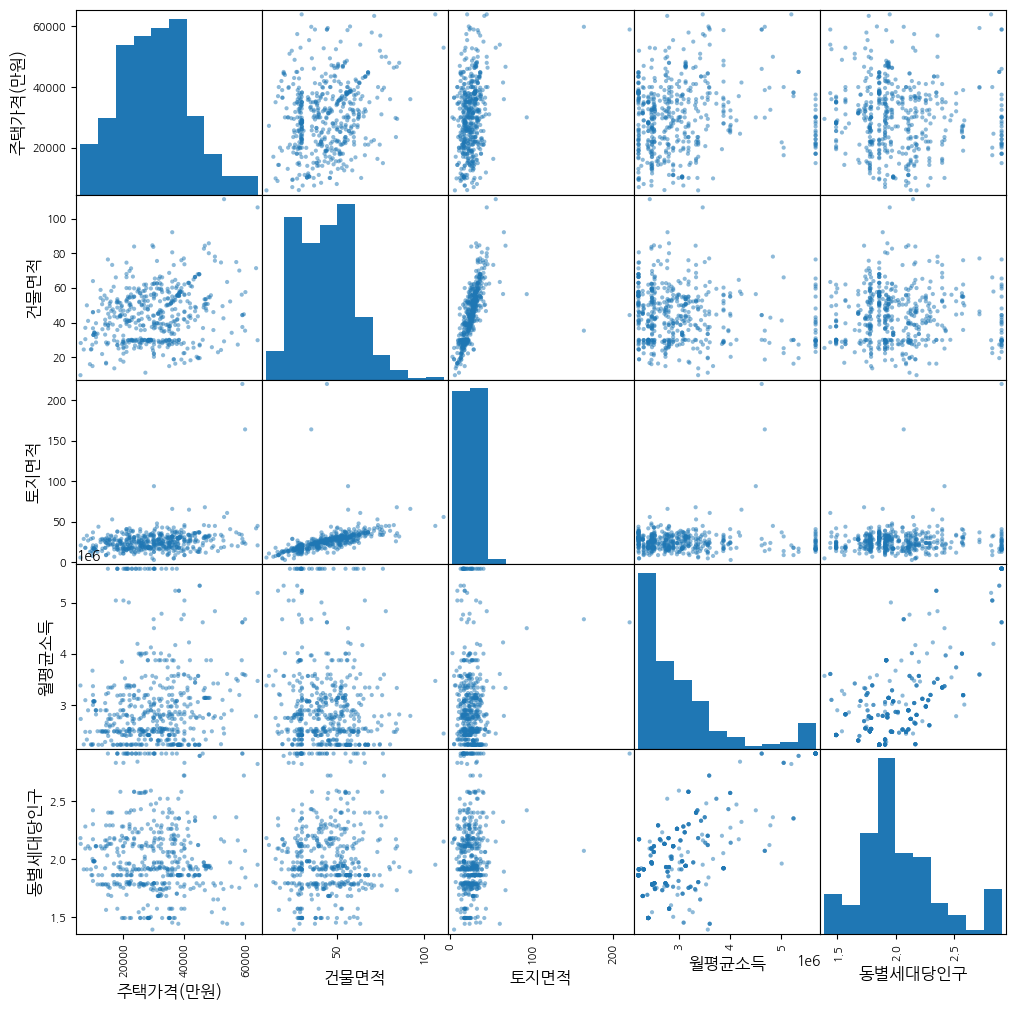

In [23]:
attributes = ['주택가격(만원)','건물면적','토지면적','월평균소득','동별세대당인구']
scatter_matrix(housing[attributes].sample(500), 
               figsize=(12,12))

plt.show()

<Axes: xlabel='건물면적', ylabel='주택가격(만원)'>

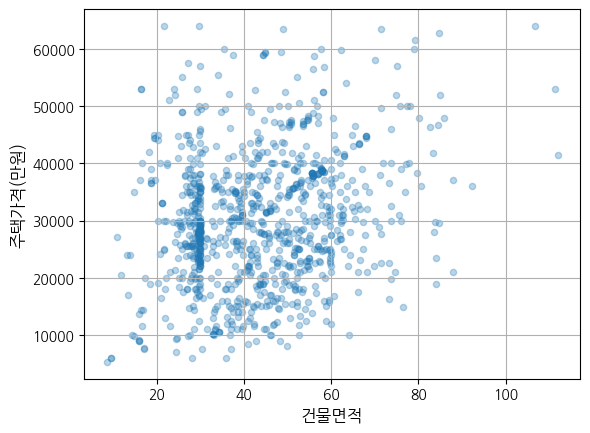

In [24]:
housing.plot(kind="scatter", x="건물면적", y="주택가격(만원)",
             alpha=0.3, grid=True)

## 특성조합
- pass

## 머신러닝 알고리즘을 위한 데이터 준비

In [25]:
# 층화 샘플링으로 분할한 데이터셋에서 라벨을 분리
housing = strat_train_set.drop("주택가격(만원)", axis=1)
housing_labels = strat_train_set["주택가격(만원)"].copy()

## 데이터 전처리: 결측치
- 결측치 행 삭제: dropna
- 결측치 열 삭제: drop
- 중위값 대체: fillna / SimpleImputer

In [26]:
housing.isna().sum()

자치구명           0
읍면동명           0
건물면적           0
토지면적           0
층              0
건축년도           0
경도            40
위도            40
월평균소득          0
동별세대수          0
동별세대당인구        0
20세미만인구        0
20세이상인구        0
income_cat     0
dtype: int64

In [27]:
null_rows_idx = housing.isnull().any(axis=1)
housing.loc[null_rows_idx].head()

,자치구명,읍면동명,건물면적,토지면적,층,건축년도,경도,위도,월평균소득,동별세대수,동별세대당인구,20세미만인구,20세이상인구,income_cat
876,강북구,수유1동,56.91,31.0,1.0,2024.0,NaN,NaN,2220463.0,10493,1.86,7930,90942,1
902,강북구,수유1동,67.95,37.0,4.0,2024.0,NaN,NaN,2220463.0,10493,1.86,7930,90942,1
886,강북구,수유1동,57.78,31.0,2.0,2024.0,NaN,NaN,2220463.0,10493,1.86,7930,90942,1
870,강북구,수유1동,55.50,30.0,2.0,2024.0,NaN,NaN,2220463.0,10493,1.86,7930,90942,1
881,강북구,수유1동,57.71,31.0,3.0,2024.0,NaN,NaN,2220463.0,10493,1.86,7930,90942,1


In [28]:
housing.loc[null_rows_idx]['자치구명'].value_counts()

자치구명
강북구    40
Name: count, dtype: int64

In [29]:
# 결측치 처리 방법1: 결측 행 날리기
housing_option1 = housing.copy()
housing_option1 = housing_option1.dropna(subset=["경도","위도"])
print(housing_option1.shape)
housing_option1.loc[null_rows_idx].head()

(933, 14)


,자치구명,읍면동명,건물면적,토지면적,층,건축년도,경도,위도,월평균소득,동별세대수,동별세대당인구,20세미만인구,20세이상인구,income_cat


In [30]:
# 결측치 처리 방법2: 결측 칼럼 날리기
housing_option2 = housing.copy()
housing_option2 = housing_option2.drop(columns=["경도","위도"])
print(housing_option2.shape)
housing_option2.loc[null_rows_idx].head()

(973, 12)


,자치구명,읍면동명,건물면적,토지면적,층,건축년도,월평균소득,동별세대수,동별세대당인구,20세미만인구,20세이상인구,income_cat
876,강북구,수유1동,56.91,31.0,1.0,2024.0,2220463.0,10493,1.86,7930,90942,1
902,강북구,수유1동,67.95,37.0,4.0,2024.0,2220463.0,10493,1.86,7930,90942,1
886,강북구,수유1동,57.78,31.0,2.0,2024.0,2220463.0,10493,1.86,7930,90942,1
870,강북구,수유1동,55.50,30.0,2.0,2024.0,2220463.0,10493,1.86,7930,90942,1
881,강북구,수유1동,57.71,31.0,3.0,2024.0,2220463.0,10493,1.86,7930,90942,1


In [31]:
# 결측치 처리 방법3: 중위값으로 대체하기
housing_option3 = housing.copy()

lat_median = housing["경도"].median()
lon_median = housing["위도"].median()

housing_option3["경도"].fillna(lat_median, inplace=True)
housing_option3["위도"].fillna(lon_median, inplace=True)

housing_option3.loc[null_rows_idx].head()

,자치구명,읍면동명,건물면적,토지면적,층,건축년도,경도,위도,월평균소득,동별세대수,동별세대당인구,20세미만인구,20세이상인구,income_cat
876,강북구,수유1동,56.91,31.0,1.0,2024.0,126.956634,37.551315,2220463.0,10493,1.86,7930,90942,1
902,강북구,수유1동,67.95,37.0,4.0,2024.0,126.956634,37.551315,2220463.0,10493,1.86,7930,90942,1
886,강북구,수유1동,57.78,31.0,2.0,2024.0,126.956634,37.551315,2220463.0,10493,1.86,7930,90942,1
870,강북구,수유1동,55.50,30.0,2.0,2024.0,126.956634,37.551315,2220463.0,10493,1.86,7930,90942,1
881,강북구,수유1동,57.71,31.0,3.0,2024.0,126.956634,37.551315,2220463.0,10493,1.86,7930,90942,1


In [32]:
# 결측치 처리방법4. 그룹별 중앙값으로 대체하기
housing_option4 = housing.copy()

housing_option4["위도"] = housing_option4["위도"].fillna(
    housing_option4.groupby(["자치구명","읍면동명"])["위도"].transform('median')
)

housing_option4["경도"] = housing_option4["경도"].fillna(
    housing_option4.groupby(["자치구명","읍면동명"])["경도"].transform('median')
)

housing_option4.loc[null_rows_idx].head(3)

,자치구명,읍면동명,건물면적,토지면적,층,건축년도,경도,위도,월평균소득,동별세대수,동별세대당인구,20세미만인구,20세이상인구,income_cat
876,강북구,수유1동,56.91,31.0,1.0,2024.0,127.01488,37.637117,2220463.0,10493,1.86,7930,90942,1
902,강북구,수유1동,67.95,37.0,4.0,2024.0,127.01488,37.637117,2220463.0,10493,1.86,7930,90942,1
886,강북구,수유1동,57.78,31.0,2.0,2024.0,127.01488,37.637117,2220463.0,10493,1.86,7930,90942,1


In [33]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median")
housing_num = housing.select_dtypes(include=[np.number])

imputer.fit(housing_num)

imputer.statistics_

array([4.20300000e+01, 2.40000000e+01, 3.00000000e+00, 2.01400000e+03,
       1.26956634e+02, 3.75513154e+01, 2.80575700e+06, 1.16590000e+04,
       1.94000000e+00, 7.93000000e+03, 6.71670000e+04])

In [34]:
housing_num.median().values

array([4.20300000e+01, 2.40000000e+01, 3.00000000e+00, 2.01400000e+03,
       1.26956634e+02, 3.75513154e+01, 2.80575700e+06, 1.16590000e+04,
       1.94000000e+00, 7.93000000e+03, 6.71670000e+04])

In [35]:
X = imputer.transform(housing_num)

In [36]:
imputer.feature_names_in_

array(['건물면적', '토지면적', '층', '건축년도', '경도', '위도', '월평균소득', '동별세대수',
       '동별세대당인구', '20세미만인구', '20세이상인구'], dtype=object)

In [37]:
housing_tr = pd.DataFrame(X, columns=housing_num.columns,
                          index=housing_num.index)


In [38]:
housing_tr.loc[null_rows_idx].head()

,건물면적,토지면적,층,건축년도,경도,위도,월평균소득,동별세대수,동별세대당인구,20세미만인구,20세이상인구
876,56.91,31.0,1.0,2024.0,126.956634,37.551315,2220463.0,10493.0,1.86,7930.0,90942.0
902,67.95,37.0,4.0,2024.0,126.956634,37.551315,2220463.0,10493.0,1.86,7930.0,90942.0
886,57.78,31.0,2.0,2024.0,126.956634,37.551315,2220463.0,10493.0,1.86,7930.0,90942.0
870,55.50,30.0,2.0,2024.0,126.956634,37.551315,2220463.0,10493.0,1.86,7930.0,90942.0
881,57.71,31.0,3.0,2024.0,126.956634,37.551315,2220463.0,10493.0,1.86,7930.0,90942.0


In [39]:
imputer.strategy

'median'

In [40]:
housing_tr = pd.DataFrame(X,columns=housing_num.columns,
                          index=housing_num.index)

In [41]:
housing_tr.loc[null_rows_idx].head()

,건물면적,토지면적,층,건축년도,경도,위도,월평균소득,동별세대수,동별세대당인구,20세미만인구,20세이상인구
876,56.91,31.0,1.0,2024.0,126.956634,37.551315,2220463.0,10493.0,1.86,7930.0,90942.0
902,67.95,37.0,4.0,2024.0,126.956634,37.551315,2220463.0,10493.0,1.86,7930.0,90942.0
886,57.78,31.0,2.0,2024.0,126.956634,37.551315,2220463.0,10493.0,1.86,7930.0,90942.0
870,55.50,30.0,2.0,2024.0,126.956634,37.551315,2220463.0,10493.0,1.86,7930.0,90942.0
881,57.71,31.0,3.0,2024.0,126.956634,37.551315,2220463.0,10493.0,1.86,7930.0,90942.0


In [42]:
# 이상치 처리
from sklearn.ensemble import IsolationForest

isolation_forest = IsolationForest(random_state=42)
outlier_pred = isolation_forest.fit_predict(X)

In [43]:
outlier_pred

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,
        1,  1,  1, -1,  1,  1,  1, -1,  1,  1,  1, -1,  1,  1,  1,  1, -1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,
        1,  1,  1,  1, -1,  1,  1,  1,  1,  1, -1,  1,  1, -1,  1,  1, -1,
        1, -1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1, -1,  1, -1,
        1,  1,  1,  1,  1,  1,  1,  1, -1, -1, -1,  1,  1,  1,  1,  1,  1,
        1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1, -1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1, -1,  1,
        1,  1,  1,  1, -1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1, -1, -1, -1,
        1,  1, -1,  1,  1, -1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,
        1,  1,  1, -1,  1,  1, -1,  1, -1,  1,  1,  1, -1,  1,  1,  1,  1,
        1,  1,  1, -1,  1

In [44]:
# housing = housing.iloc[outlier_pred == 1] #입력 특성 적용
# housing_labels = housing_labels.iloc[outlier_pred == 1] #레이블 적용
# housing_labels

## 텍스트와 범주형 특성 다루기

In [45]:
housing.select_dtypes(include=[object]).columns.to_list()

['자치구명', '읍면동명']

In [46]:
housing_cat = housing[["자치구명"]]
housing_cat.nunique()

자치구명    25
dtype: int64

In [47]:
housing_cat.head()

,자치구명
819,중구
556,중랑구
603,은평구
969,강서구
137,강동구


In [48]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)

In [49]:
housing_cat_encoded[:8]

array([[23.],
       [24.],
       [21.],
       [ 3.],
       [ 1.],
       [16.],
       [ 6.],
       [24.]])

In [50]:
ordinal_encoder.categories_

[array(['강남구', '강동구', '강북구', '강서구', '관악구', '광진구', '구로구', '금천구', '노원구',
        '도봉구', '동대문구', '동작구', '마포구', '서대문구', '서초구', '성동구', '성북구', '송파구',
        '양천구', '영등포구', '용산구', '은평구', '종로구', '중구', '중랑구'], dtype=object)]

In [51]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)

housing_cat_1hot

<973x25 sparse matrix of type '<class 'numpy.float64'>'
	with 973 stored elements in Compressed Sparse Row format>

In [52]:
housing_cat_1hot.toarray()

array([[0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [53]:
# 밀집행렬로 변환
cat_encoder = OneHotEncoder(sparse_output=False)
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

array([[0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [54]:
cat_encoder.categories_

[array(['강남구', '강동구', '강북구', '강서구', '관악구', '광진구', '구로구', '금천구', '노원구',
        '도봉구', '동대문구', '동작구', '마포구', '서대문구', '서초구', '성동구', '성북구', '송파구',
        '양천구', '영등포구', '용산구', '은평구', '종로구', '중구', '중랑구'], dtype=object)]

In [55]:
# pandas의 get dummies 활용 - 샘플로 2개만 확인해보는 작업임
df_test = pd.DataFrame({"자치구명":["강남구","마포구"]})
pd.get_dummies(df_test)

,자치구명_강남구,자치구명_마포구
0,True,False
1,False,True


In [56]:
# onehotencoder와 비교해보기
cat_encoder.transform(df_test)

array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [57]:
df_test_unknown = pd.DataFrame({"자치구명":["아무거나구","싸다구"]})
pd.get_dummies(df_test_unknown)

,자치구명_싸다구,자치구명_아무거나구
0,False,True
1,True,False


In [58]:
cat_encoder.handle_unknown = "ignore"
cat_encoder.transform(df_test_unknown)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [59]:
cat_encoder.feature_names_in_

array(['자치구명'], dtype=object)

In [60]:
cat_encoder.get_feature_names_out()

array(['자치구명_강남구', '자치구명_강동구', '자치구명_강북구', '자치구명_강서구', '자치구명_관악구',
       '자치구명_광진구', '자치구명_구로구', '자치구명_금천구', '자치구명_노원구', '자치구명_도봉구',
       '자치구명_동대문구', '자치구명_동작구', '자치구명_마포구', '자치구명_서대문구', '자치구명_서초구',
       '자치구명_성동구', '자치구명_성북구', '자치구명_송파구', '자치구명_양천구', '자치구명_영등포구',
       '자치구명_용산구', '자치구명_은평구', '자치구명_종로구', '자치구명_중구', '자치구명_중랑구'],
      dtype=object)

In [61]:
df_output = pd.DataFrame(cat_encoder.transform(df_test_unknown),
                         columns=cat_encoder.get_feature_names_out(),
                         index=df_test_unknown.index)

df_output

,자치구명_강남구,자치구명_강동구,자치구명_강북구,자치구명_강서구,자치구명_관악구,자치구명_광진구,자치구명_구로구,자치구명_금천구,자치구명_노원구,자치구명_도봉구,...,자치구명_성동구,자치구명_성북구,자치구명_송파구,자치구명_양천구,자치구명_영등포구,자치구명_용산구,자치구명_은평구,자치구명_종로구,자치구명_중구,자치구명_중랑구
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## 특성 스케일링

In [62]:
from sklearn.preprocessing import MinMaxScaler

# 신경망은 평균이 0인 데이터에서 잘 작동. 따라서 -1~1에서 작동
min_max_scaler = MinMaxScaler(feature_range=(-1,1))
housing_num_min_max_scaled = min_max_scaler.fit_transform(housing_num)

In [63]:
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()
housing_num_std_scaled = std_scaler.fit_transform(housing_num)

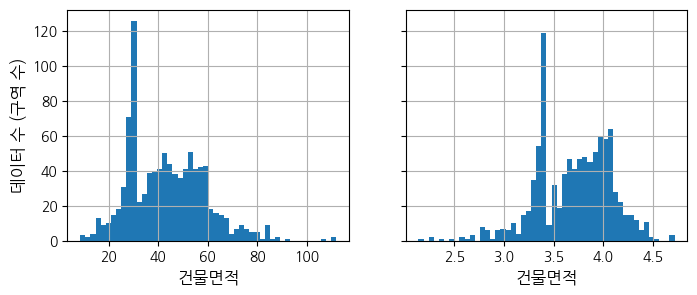

In [64]:
# 왼쪽으로 치우친 피처: 건물면적, 주택가격
fig, axs = plt.subplots(1,2, figsize=(8,3), sharey=True)
housing["건물면적"].hist(ax=axs[0], bins=50)
housing["건물면적"].apply(np.log).hist(ax=axs[1], bins=50)
axs[0].set_xlabel("건물면적")
axs[1].set_xlabel("건물면적")
axs[0].set_ylabel("데이터 수 (구역 수)")
plt.show()

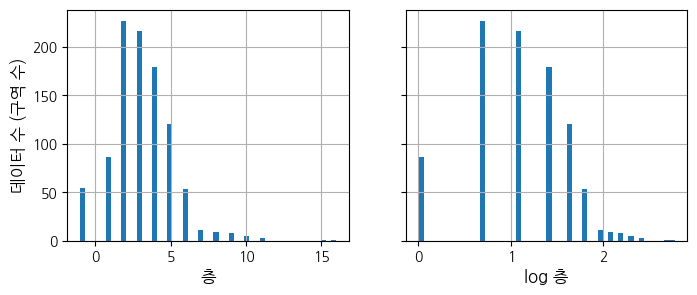

In [65]:
fig, axs = plt.subplots(1 , 2, figsize=(8,3), sharey=True)
housing["층"].hist(ax=axs[0], bins=50)
housing["층"].apply(np.log).hist(ax=axs[1], bins=50)
axs[0].set_xlabel("층")
axs[1].set_xlabel("log 층")
axs[0].set_ylabel("데이터 수 (구역 수)")
plt.show()

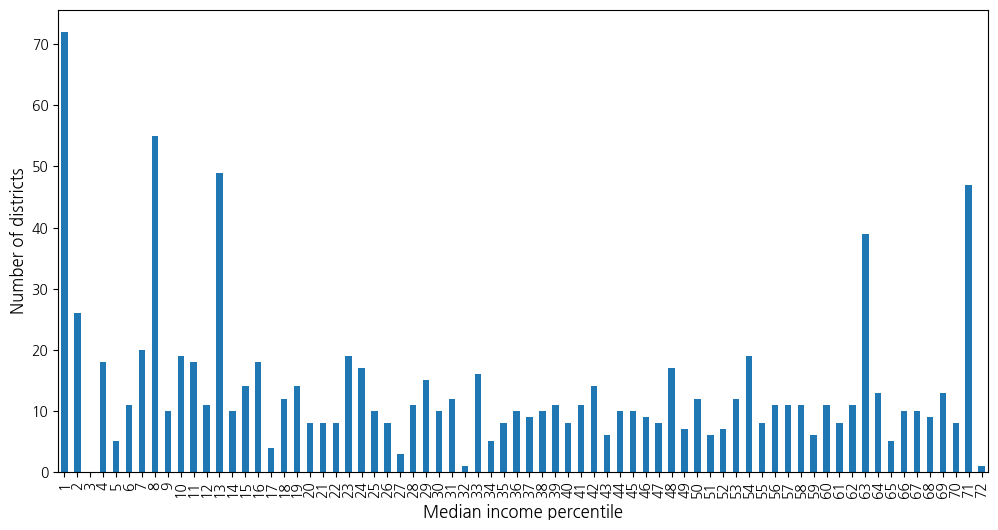

In [66]:

percentiles = [np.percentile(housing["월평균소득"], p)
               for p in range(1, 100)]
percentiles = np.unique(percentiles) 
flattened_median_income = pd.cut(
    housing["월평균소득"],
    bins=[-np.inf] + percentiles.tolist() + [np.inf],
    labels=range(1, len(percentiles) + 2),  # labels의 길이 조정
    duplicates="drop"  # 중복된 bin 제거
)
flattened_median_income.value_counts().sort_index().plot(kind="bar", figsize=(12, 6))

plt.xlabel("Median income percentile")
plt.ylabel("Number of districts")
plt.show()

In [67]:
from sklearn.metrics.pairwise import rbf_kernel
age_simil_35 = rbf_kernel(housing[["건물면적"]], [[30]], gamma=0.1)

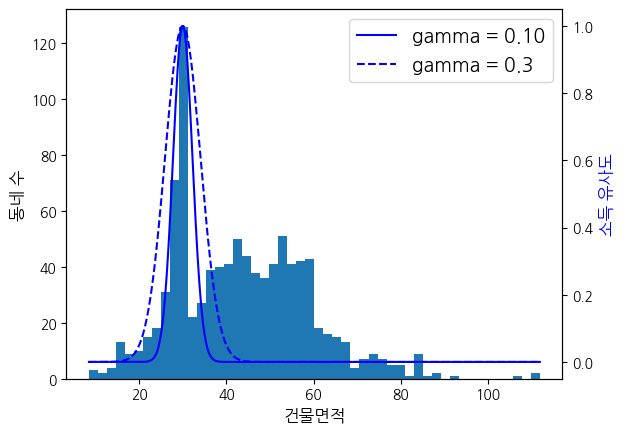

In [68]:
ages = np.linspace(housing["건물면적"].min(),
                   housing["건물면적"].max(),
                   500).reshape(-1,1)

gamma1 = 0.1
gamma2 = 0.03
rbf1 = rbf_kernel(ages, [[30]], gamma=gamma1)
rbf2 = rbf_kernel(ages, [[30]], gamma=gamma2)

fig, ax1 = plt.subplots()
ax1.set_xlabel("건물면적")
ax1.set_ylabel("동네 수")
ax1.hist(housing["건물면적"], bins=50)

ax2 = ax1.twinx()
color = "blue"
ax2.plot(ages, rbf1, color=color, label="gamma = 0.10")
ax2.plot(ages, rbf2, color=color, label="gamma = 0.3", linestyle="--")
ax2.set_ylabel("소득 유사도", color = color)

plt.legend(loc="upper right")
plt.show()

In [69]:
housing.isna().sum()

자치구명           0
읍면동명           0
건물면적           0
토지면적           0
층              0
건축년도           0
경도            40
위도            40
월평균소득          0
동별세대수          0
동별세대당인구        0
20세미만인구        0
20세이상인구        0
income_cat     0
dtype: int64

In [70]:
print(housing.shape)
print(housing_labels.shape)

(973, 14)
(973,)


In [71]:
# 소득과 주택 가격 간 회귀 분석
from sklearn.linear_model import LinearRegression



# 라벨 스케일링
target_scaler = StandardScaler()
scaled_labels = target_scaler.fit_transform(housing_labels.to_frame())

model = LinearRegression()
model.fit(housing[["월평균소득"]], scaled_labels)

some_new_data = housing[["월평균소득"]].iloc[:5] #새로운 데이터라고 가정 (예측 대상)

scaled_predictions = model.predict(some_new_data) #모델에 새로운 데이터 예측시킴
predictions = target_scaler.inverse_transform(scaled_predictions) #예측값 변환

predictions

array([[29726.40838561],
       [28946.57359616],
       [29261.39746465],
       [29203.97991198],
       [29184.52018242]])

In [72]:
from sklearn.compose import TransformedTargetRegressor

# 스케일러랑 회귀 한방에 쓰는 라이브러리
## 궁금1: 회귀 종류 뭐 쓸 수 있을까? 다른 옵션은 뭐가 있을까?
model = TransformedTargetRegressor(LinearRegression(),
                                   transformer=StandardScaler())
model.fit(housing[["월평균소득"]], housing_labels)
predictions = model.predict(some_new_data)
predictions

array([29726.40838561, 28946.57359616, 29261.39746465, 29203.97991198,
       29184.52018242])

In [73]:
some_new_data

,월평균소득
819,2816850.0
556,2322173.0
603,2521877.0
969,2485455.0
137,2473111.0


In [74]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
Index: 973 entries, 819 to 382
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   자치구명        973 non-null    object  
 1   읍면동명        973 non-null    object  
 2   건물면적        973 non-null    float64 
 3   토지면적        973 non-null    float64 
 4   층           973 non-null    float64 
 5   건축년도        973 non-null    float64 
 6   경도          933 non-null    float64 
 7   위도          933 non-null    float64 
 8   월평균소득       973 non-null    float64 
 9   동별세대수       973 non-null    int64   
 10  동별세대당인구     973 non-null    float64 
 11  20세미만인구     973 non-null    int64   
 12  20세이상인구     973 non-null    int64   
 13  income_cat  973 non-null    category
dtypes: category(1), float64(8), int64(3), object(2)
memory usage: 139.9+ KB


## 사용자 정의 변환기

In [75]:
from sklearn.preprocessing import FunctionTransformer
# FunctionTransformer 사용자 정의 함수를 sklearn의 변환기로 사용할 수 있게 해주는 클래스
# log, rbf와 같은 기존 라이브러리를 넣어 사용 가능
log_transformer = FunctionTransformer(np.log, inverse_func=np.exp)
log_pop = log_transformer.transform(housing[["동별세대수"]])

In [76]:
rbf_transformer = FunctionTransformer(rbf_kernel,
                                      kw_args=dict(Y=[[30]], gamma=0.1))
age_simil_35 = rbf_transformer.transform(housing[["건물면적"]])
age_simil_35[:3]

array([[1.07989309e-22],
       [7.38776381e-01],
       [7.38374286e-61]])

In [77]:
# 샌프란시스코 거리/지역적 유사성 위해 "샌프란" 좌표를 RBF커널로 모델링함
# 이 데이터는 서울 주택 가격 예측이므로 "강남구" 좌표를 RBF커널로 모델링함
# sf_coords = 37.7749, -122.41
seoul_coords = 37.5172, 127.0473  # 강남구 좌표

sf_transformer = FunctionTransformer(rbf_kernel,
                                     kw_args=dict(Y=[seoul_coords], gamma=0.1))
sf_simil = sf_transformer.transform(housing_option1[["위도", "경도"]])

sf_simil[:3]

array([[0.99969062],
       [0.99926811],
       [0.99759074]])

In [78]:
# FunctionTransformer 사용자 정의 함수를 sklearn의 변환기로 사용할 수 있게 해주는 클래스
## 아래처럼 람다함수를 통해 직접 구현도 가능
ratio_transformer = FunctionTransformer(lambda X: X[:, [0]] / X[:,[1]]) #첫번째 열을 두번째 열로 나누기
ratio_transformer.transform(np.array([[1.,2.], [3.,4.]]))

array([[0.5 ],
       [0.75]])

In [79]:
from sklearn.base import BaseEstimator, TransformerMixin #TransformerMixin은 fit_transform() 메서드 자동 제공
from sklearn.utils.validation import check_array, check_is_fitted

class StandardScalerClone(BaseEstimator, TransformerMixin):
    def __init__(self, with_mean=True):
        self.with_mean = with_mean

    def fit(self, X, y=None): # 사용하지 않더라도 y를 넣어주어야 함
        X = check_array(X) # X가 부동소수점 배열인지 확인해야 함
        self.mean_ = X.mean(axis=0)
        self.scale_ = X.std(axis=0)
        self.n_features_in_ = X.shape[1] #모든 추정기는 fit()에서 이를 저장함
        return self

    def transform(self, X):
        check_is_fitted(self) # 훈련으로 학습된 속성이 있는지 확인
        X = check_array(X)
        assert self.n_features_in_ == X.shape[1] 
        
        if self.with_mean:
            X = X - self.mean_
            return X / self.scale_


In [80]:
from sklearn.cluster import KMeans

class ClusterSimilarity(BaseEstimator, TransformerMixin):
    def __init__(self, n_clusters=10, gamma=1.0, random_state=None):
        self.n_clusters = n_clusters
        self.gamma = gamma
        self.random_state = random_state

    def fit(self, X, y=None, sample_weight=None):
        self.kmeans_ = KMeans(self.n_clusters, n_init=10, random_state=self.random_state)
        self.kmeans_.fit(X, sample_weight=sample_weight)
        return self
    
    def transform(self, X):
        return rbf_kernel(X, self.kmeans_.cluster_centers_, gamma=self.gamma)
    
    def get_feature_names_out(self, names=None):
        return [f"클러스터 {i} 유사도" for i in range(self.n_clusters)]

In [81]:
cluster_simil = ClusterSimilarity(n_clusters=4, gamma=1.0, random_state=42)
similarities = cluster_simil.fit_transform(housing_option4[['경도','위도']], sample_weight=housing_labels)

In [82]:
similarities[:3].round(2)

array([[0.99, 0.99, 0.99, 1.  ],
       [1.  , 0.96, 0.97, 1.  ],
       [0.96, 1.  , 0.99, 0.99]])

In [83]:
cluster_simil.kmeans_.cluster_centers_

array([[127.10484823,  37.53166211],
       [126.8820291 ,  37.55821315],
       [126.93715904,  37.49297623],
       [127.03837332,  37.61092474]])

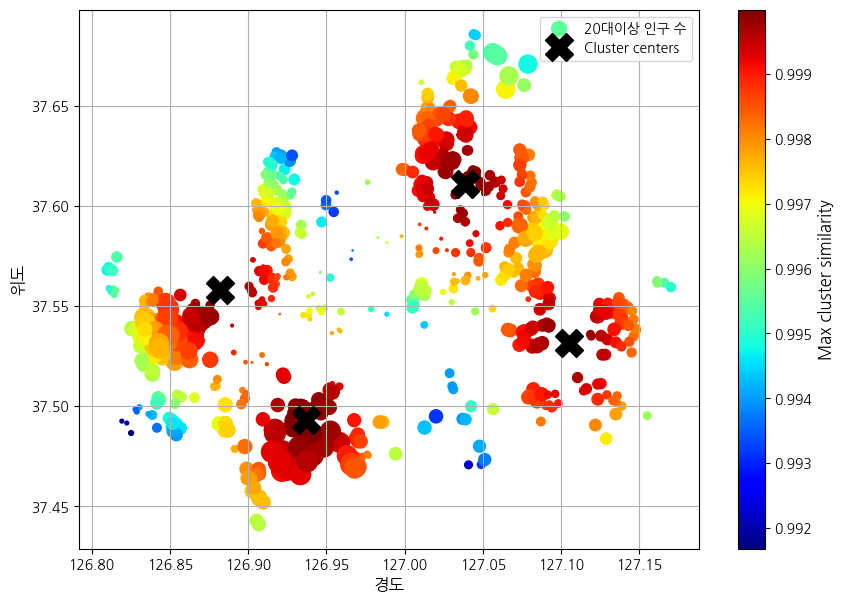

In [84]:
housing_rename = housing.copy()
housing_rename["Max cluster similarity"] = similarities.max(axis=1)

housing_rename.plot(kind="scatter", x="경도", y="위도", grid=True,
             s=housing_rename["20세이상인구"]/1000, label="20대이상 인구 수",
             c="Max cluster similarity",
             cmap="jet", colorbar=True,
             legend=True, sharex=False,
             figsize=(10,7))

plt.plot(cluster_simil.kmeans_.cluster_centers_[:, 0],
         cluster_simil.kmeans_.cluster_centers_[:, 1],
         linestyle="", color="black", marker="X", markersize=20,
         label="Cluster centers")

# seoul_img = plt.imread("datasets/seoul.png")
# plt.axis(axis)
# plt.imshow(seoul_img, extent=axis)


plt.legend(loc="upper right", fontsize=10)
plt.show()

## 변환 파이브라인
수치 특성을 전처리하는 파이프라인

In [85]:
from sklearn.pipeline import Pipeline

num_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("standardize", StandardScaler()),
])

In [86]:
from sklearn.pipeline import make_pipeline
num_pipeline = make_pipeline(SimpleImputer(strategy="median"), StandardScaler())

In [87]:
from sklearn import set_config
set_config(display='diagram')
num_pipeline

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('standardscaler', StandardScaler())])

In [88]:
housing_num_prepared = num_pipeline.fit_transform(housing_num)
housing_num_prepared[:2].round(2)

array([[ 0.59, -0.26, -2.07, -0.78,  0.33, -0.06, -0.27, -1.56, -1.3 ,
        -0.56, -0.36],
       [-0.97, -0.42, -0.09,  0.97,  1.28,  0.66, -0.84, -0.2 , -0.34,
         0.26,  0.68]])

In [89]:
df_housing_num_prepared = pd.DataFrame(housing_num_prepared, 
                                       columns=num_pipeline.get_feature_names_out(), 
                                       index=housing_num.index)

In [90]:
df_housing_num_prepared.head(2)

,건물면적,토지면적,층,건축년도,경도,위도,월평균소득,동별세대수,동별세대당인구,20세미만인구,20세이상인구
819,0.591405,-0.264387,-2.072517,-0.779271,0.330008,-0.064222,-0.273666,-1.558313,-1.301624,-0.559019,-0.358015
556,-0.968967,-0.419573,-0.093558,0.966598,1.284489,0.657856,-0.837411,-0.198770,-0.339748,0.256092,0.683060


In [91]:
num_pipeline.steps

[('simpleimputer', SimpleImputer(strategy='median')),
 ('standardscaler', StandardScaler())]

### 사용자 정의 imputer: 그룹별 중앙값으로 대체
- (1) 사용자 클래스 방식
    - BaseEstimator, TransformerMixin 상속
    - 상태 저장 가능. 반복 사용 가능. 그리드서칭 가능
- (2) 함수 생성 방식
    - FunctionTransformer 방식
    - stateless

In [92]:
# (1) 사용자 클래스 방식
class GroupImputer(BaseEstimator, TransformerMixin):
    def __init__(self, group_col, strategy='median', return_df=False):
        self.group_col = group_col
        self.strategy = strategy
        self.return_df = return_df

    def fit(self, X, y=None):
        X_df = pd.DataFrame(X).copy()
        self.numeric_features_ = X_df.select_dtypes(include=[np.number]).columns.drop(self.group_col, errors='ignore')

        if self.strategy not in ['mean', 'median', 'most_frequent']:
            raise ValueError("strategy를 다시 입력하세요: 'mean', 'median', 'most_frequent'")

        agg_func = {
            'mean': 'mean',
            'median': 'median',
            'most_frequent': lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan
        }[self.strategy]

        self.impute_values_ = {}
        for col in self.numeric_features_:
            grouped = X_df.groupby(self.group_col)[col].agg(agg_func)
            self.impute_values_[col] = grouped.to_dict()

        return self

    def transform(self, X): # strategy에 따른 값을 매핑함. 
        check_is_fitted(self, 'impute_values_')
        X_df = pd.DataFrame(X).copy()

        for col in self.numeric_features_:
            mask = X_df[col].isnull()
            if mask.any():
                X_df.loc[mask, col] = X_df.loc[mask, self.group_col].map(self.impute_values_[col])

        if self.return_df:
            return X_df[self.numeric_features_]
        else:
            return X_df[self.numeric_features_].to_numpy()

    def get_feature_names_out(self, input_features=None):
        return self.numeric_features_

In [93]:
num_cols = housing.select_dtypes(include=[np.number]).columns.to_list()
cat_cols = housing.select_dtypes(include=object).columns.to_list()
group_col = "읍면동명"


num_pipeline = Pipeline([
    ("groupimputer", GroupImputer(group_col = group_col)),
    ("standardize", StandardScaler())
])

cat_pipeline = Pipeline([
    ("simpleimputer", SimpleImputer(strategy="frequent")),
    ("onehotencoder", OneHotEncoder())
])

num_features_with_group = num_cols + [group_col]

In [94]:
housing_num_prepared2 = num_pipeline.fit_transform(housing)

In [95]:
housing_num_prepared2


array([[ 0.59140515, -0.26438654, -2.07251659, ..., -1.30162445,
        -0.55901857, -0.35801533],
       [-0.96896746, -0.41957341, -0.09355816, ..., -0.33974762,
         0.2560925 ,  0.68305963],
       [ 1.53934922,  0.20117408, -0.09355816, ...,  0.22606228,
        -0.73604857, -0.69937662],
       ...,
       [-1.08359657, -0.57476029,  0.40118145, ...,  0.25435278,
         0.9532351 ,  0.14964043],
       [ 0.16701986,  0.14944512, -0.58829777, ...,  0.42409575,
        -0.14172252, -0.14090339],
       [-0.85755827, -0.41957341,  0.40118145, ...,  1.2445201 ,
        -0.38755458, -0.80685984]])

In [96]:
# (2) FunctionTransformer 방식
def group_median(X, group, target): 
    X_df = pd.DataFrame(X, columns=[group, target])
    group_medians = X_df.groupby(group)[target].median().to_dict()

    mask = X_df[target].isnull()
    
    X_df.loc[mask, target] = X_df.loc[mask, group].map(group_medians)

    return X_df[[target]].to_numpy()

def group_median_name(transformer, feature_names_in):
    return ["imputed"]

def group_pipeline(group, target):
    return make_pipeline(
        FunctionTransformer(
            func = group_median,
            kw_args={"group":group, "target":target},
            feature_names_out=group_median_name
        )
    )


In [97]:
preprocessing2 = ColumnTransformer([
    ("경도", group_pipeline(group="읍면동명", target="경도"), ["읍면동명","경도"]),
    ("위도", group_pipeline(group="읍면동명", target="위도"), ["읍면동명","위도"])
])

housing_prepared2 = preprocessing2.fit_transform(housing)
housing_prepared2

array([[127.00481122,  37.55310238],
       [127.0916191 ,  37.59039428],
       [126.91649652,  37.60093814],
       ...,
       [127.01275447,  37.48931668],
       [126.84150193,  37.50153039],
       [126.86633362,  37.55131542]])

## 전처리 파이브라인 최종

In [98]:
num_cols = housing.select_dtypes(include=[np.number]).columns.to_list()
cat_cols = housing.select_dtypes(include=object).columns.to_list()

group_col = "읍면동명"
num_features_with_group = num_cols + [group_col]

num_pipeline = Pipeline([
    ("groupimputer", GroupImputer(group_col = group_col)),
    ("standardize", StandardScaler())
])

cat_pipeline = Pipeline([
    ("simpleimputer", SimpleImputer(strategy="most_frequent")),
    ("onehotencoder", OneHotEncoder(sparse_output=False, handle_unknown="ignore"))
])

num_features_with_group = num_cols + [group_col]

preprocessing = ColumnTransformer([
    ("num", num_pipeline, num_features_with_group),
    ("cat", cat_pipeline, cat_cols)
])

print(cat_cols)
print(num_features_with_group)

['자치구명', '읍면동명']
['건물면적', '토지면적', '층', '건축년도', '경도', '위도', '월평균소득', '동별세대수', '동별세대당인구', '20세미만인구', '20세이상인구', '읍면동명']


In [99]:
cat_cols.remove('자치구명')
num_features_with_group.remove('토지면적')
num_features_with_group.remove('동별세대당인구')
num_features_with_group.remove('20세미만인구')


print(cat_cols)
print(num_features_with_group)

['읍면동명']
['건물면적', '층', '건축년도', '경도', '위도', '월평균소득', '동별세대수', '20세이상인구', '읍면동명']


In [100]:
housing_prepared = preprocessing.fit_transform(housing)
housing_prepared.shape

(973, 154)

In [101]:
preprocessing.get_feature_names_out()[:10]

array(['num__건물면적', 'num__층', 'num__건축년도', 'num__경도', 'num__위도',
       'num__월평균소득', 'num__동별세대수', 'num__20세이상인구', 'cat__읍면동명_가락본동',
       'cat__읍면동명_가산동'], dtype=object)

## 모델 선택과 훈련

### 훈련 세트에서 훈련하고 평가하기

### (1) 선형 회귀

In [102]:
from sklearn.linear_model import LinearRegression

lin_reg = make_pipeline(preprocessing, LinearRegression())
lin_reg.fit(housing, housing_labels)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('groupimputer',
                                                                   GroupImputer(group_col='읍면동명')),
                                                                  ('standardize',
                                                                   StandardScaler())]),
                                                  ['건물면적', '층', '건축년도', '경도',
                                                   '위도', '월평균소득', '동별세대수',
                                                   '20세이상인구', '읍면동명']),
                                                 ('cat',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['읍면동명'])])),
                ('linearregression', LinearRegression())])

In [103]:
housing_predictions = lin_reg.predict(housing)
housing_predictions[:5].round(-2)

array([34900., 33200., 28500., 20300., 30600.])

In [104]:
housing_labels.iloc[:5].values

array([18000, 29500, 29700, 20500, 27000])

In [105]:
error_ratios = housing_predictions[:5].round(-2)/housing_labels.iloc[:5].values - 1
print(", ".join([f"{100 * ratio:.1f}%" for ratio in error_ratios]))

93.9%, 12.5%, -4.0%, -1.0%, 13.3%


In [106]:
from sklearn.metrics import mean_squared_error

lin_rmse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse

38332620.73419479

In [107]:
from sklearn.model_selection import cross_val_score


lin_rmses = -cross_val_score(lin_reg, housing, housing_labels,
                             scoring="neg_root_mean_squared_error", cv=10)
pd.Series(lin_rmses).describe()

count      10.000000
mean     8026.103854
std       675.571002
min      7019.862067
25%      7755.504541
50%      7954.829381
75%      8059.483623
max      9640.484810
dtype: float64

### (2) 의사결정나무

In [108]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = make_pipeline(preprocessing, DecisionTreeRegressor(random_state=42))
tree_reg.fit(housing, housing_labels)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('groupimputer',
                                                                   GroupImputer(group_col='읍면동명')),
                                                                  ('standardize',
                                                                   StandardScaler())]),
                                                  ['건물면적', '층', '건축년도', '경도',
                                                   '위도', '월평균소득', '동별세대수',
                                                   '20세이상인구', '읍면동명']),
                                                 ('cat',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['읍면동명'])])),
                ('decisiontreeregressor',
                 DecisionTreeRegressor(random_state=42))])

In [109]:
housing_predictions = tree_reg.predict(housing)
tree_rmse = mean_squared_error(housing_labels, housing_predictions)

tree_rmse

11003.768413840358

In [110]:
from sklearn.model_selection import cross_val_score

tree_rmses = -cross_val_score(tree_reg, housing, housing_labels,
                              scoring="neg_root_mean_squared_error", cv=10)

pd.Series(tree_rmses).describe()

count       10.000000
mean      9599.181531
std       1078.476409
min       7595.940947
25%       9094.903977
50%       9326.586395
75%      10148.399039
max      11547.750782
dtype: float64

### (3) 랜덤포레스트

In [135]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = make_pipeline(preprocessing,
                           RandomForestRegressor(random_state=42))
forest_rmses = -cross_val_score(forest_reg, housing, housing_labels, 
                                scoring="neg_root_mean_squared_error", cv=5)

In [136]:
forest_rmses

array([6722.7725366 , 7252.20891598, 7889.89792493, 7425.02815173,
       6827.00927368])

In [137]:
pd.Series(forest_rmses).describe()

count       5.000000
mean     7223.383361
std       472.614222
min      6722.772537
25%      6827.009274
50%      7252.208916
75%      7425.028152
max      7889.897925
dtype: float64

In [140]:
forest_reg.fit(housing, housing_labels)
housing_predictions = forest_reg.predict(housing)
forest_mse = mean_squared_error(housing_labels, housing_predictions)

forest_rmse = np.sqrt(forest_mse)
forest_rmse

2664.3622552909715

In [144]:
import sklearn

print(sklearn.__version__)

1.6.1


In [ ]:
!pip install --upgrade scikit-learn

Note: you may need to restart the kernel to use updated packages.


## 모델 미세 튜닝
그리드 탐색

In [128]:
from sklearn.model_selection import GridSearchCV

full_pipeline = Pipeline([
    ("preprocessing", preprocessing),
    ("random_forest", RandomForestRegressor(random_state=42)),
])

# 파이프라인 내 하위 모델의 하이퍼파라미터를 그리드서치로 넘기기는 dict
param_grid = {
    "random_forest__max_features": [4, 6, 8], # 더블 언더바로 파이프라인 내 모델 파라미터 지정
    "random_forest__max_features": [6, 8, 10], # random_forest + 랜포의 파라미터 max_features
    "random_forest__max_depth": [None, 10, 20],
    "random_forest__n_estimators": [100,200]
    } 

# 일반 용례
# param_grid = [
#     {"model": [SVC()], "model__C": [1,10]},
#     {"model": [RandomForestClassifier()], "model__n_estimators": [100,200]}
# ]


grid_search = GridSearchCV(
    estimator=full_pipeline, 
    param_grid=param_grid, 
    scoring='neg_root_mean_squared_error',
    cv=5
    )

grid_search.fit(housing, housing_labels)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('groupimputer',
                                                                                          GroupImputer(group_col='읍면동명')),
                                                                                         ('standardize',
                                                                                          StandardScaler())]),
                                                                         ['건물면적',
                                                                          '층',
                                                                          '건축년도',
                                                                          '경도',
                                                                          '위도',
                                                                          '월평균소득',
                                                                          '동별세대수',
                                                                          '20세이상인구',
                                                                          '읍면동명']),
                                                                        ('cat',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('onehotencoder',
                                                                                          OneHotEncoder(handle_unknown='ignore',
                                                                                                        sparse_output=False))]),
                                                                         ['읍면동명'])])),
                                       ('random_forest',
                                        RandomForestRegressor(random_state=42))]),
             param_grid={'random_forest__max_depth': [None, 10, 20],
                         'random_forest__max_features': [6, 8, 10],
                         'random_forest__n_estimators': [100, 200]},
             scoring='neg_root_mean_squared_error')

In [130]:
print(grid_search.best_params_)
print("\n\n\n")
print(np.sqrt(-grid_search.best_score_))

{'random_forest__max_depth': None, 'random_forest__max_features': 10, 'random_forest__n_estimators': 200}




87.33163504025521


In [116]:
print(str(full_pipeline.get_params().keys())[:1000] + "...")

dict_keys(['memory', 'steps', 'transform_input', 'verbose', 'preprocessing', 'random_forest', 'preprocessing__force_int_remainder_cols', 'preprocessing__n_jobs', 'preprocessing__remainder', 'preprocessing__sparse_threshold', 'preprocessing__transformer_weights', 'preprocessing__transformers', 'preprocessing__verbose', 'preprocessing__verbose_feature_names_out', 'preprocessing__num', 'preprocessing__cat', 'preprocessing__num__memory', 'preprocessing__num__steps', 'preprocessing__num__transform_input', 'preprocessing__num__verbose', 'preprocessing__num__groupimputer', 'preprocessing__num__standardize', 'preprocessing__num__groupimputer__group_col', 'preprocessing__num__groupimputer__return_df', 'preprocessing__num__groupimputer__strategy', 'preprocessing__num__standardize__copy', 'preprocessing__num__standardize__with_mean', 'preprocessing__num__standardize__with_std', 'preprocessing__cat__memory', 'preprocessing__cat__steps', 'preprocessing__cat__transform_input', 'preprocessing__cat__v

In [131]:
grid_search.best_params_

{'random_forest__max_depth': None,
 'random_forest__max_features': 10,
 'random_forest__n_estimators': 200}

In [132]:
grid_search.best_estimator_

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('groupimputer',
                                                                   GroupImputer(group_col='읍면동명')),
                                                                  ('standardize',
                                                                   StandardScaler())]),
                                                  ['건물면적', '층', '건축년도', '경도',
                                                   '위도', '월평균소득', '동별세대수',
                                                   '20세이상인구', '읍면동명']),
                                                 ('cat',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['읍면동명'])])),
                ('random_forest',
                 RandomForestRegressor(max_features=10, n_estimators=200,
                                       random_state=42))])

In [147]:
grid_search.cv_results_.keys()

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_random_forest__max_depth', 'param_random_forest__max_features', 'param_random_forest__n_estimators', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score'])

In [149]:
pd.DataFrame(grid_search.cv_results_).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_random_forest__max_depth,param_random_forest__max_features,param_random_forest__n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.398232,0.041316,0.031586,0.002913,None,6,100,"{'random_forest__max_depth': None, 'random_for...",-7155.599605,-8138.873069,-8452.258113,-7885.358803,-7257.814108,-7777.980740,500.870223,7
1,0.722924,0.023464,0.047585,0.001979,None,6,200,"{'random_forest__max_depth': None, 'random_for...",-7133.210946,-8152.667799,-8320.773560,-7803.223219,-7217.104371,-7725.395979,480.028379,5
2,0.370184,0.004869,0.030094,0.000548,None,8,100,"{'random_forest__max_depth': None, 'random_for...",-7084.377513,-8162.322825,-8280.216778,-7862.121068,-7202.019603,-7718.211557,490.304877,4
3,0.717187,0.017555,0.046076,0.000520,None,8,200,"{'random_forest__max_depth': None, 'random_for...",-7107.802898,-8112.227766,-8288.933785,-7752.205094,-7171.333991,-7686.500707,479.327468,3
4,0.386180,0.023603,0.030353,0.002646,None,10,100,"{'random_forest__max_depth': None, 'random_for...",-7098.464032,-8083.248364,-8115.896172,-7825.917151,-7235.965029,-7671.898149,426.363570,2


In [119]:
cv_res = pd.DataFrame(grid_search.cv_results_)
cv_res.sort_values(by="mean_test_score", ascending=False, inplace=True)

cv_res = cv_res[["param_random_forest__max_features",
                 "split0_test_score",
                 "split1_test_score",
                 "split2_test_score",
                 "mean_test_score"]]

score_cols = ["split0", "split1", "split2", "mean_test_rmse"]
cv_res.columns = ["max_features"] + score_cols
cv_res[score_cols] = -cv_res[score_cols].round().astype(np.int64)

cv_res.head()

,max_features,split0,split1,split2,mean_test_rmse
5,10,7343,8054,7455,7617
2,8,7314,8098,7582,7665
4,8,7314,8098,7582,7665
1,6,7430,8173,7656,7753
3,6,7430,8173,7656,7753


## 랜덤 탐색

In [ ]:
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingRandomSearchCV
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

In [ ]:
param_distribs = {'random_forest__max_features': randint(low=2, high=20)}

rnd_search = RandomizedSearchCV(
    full_pipeline, 
    param_distributions=param_distribs, 
    n_iter=10, 
    cv=3,
    scoring='neg_root_mean_squared_error', 
    random_state=42
    )

rnd_search.fit(housing, housing_labels)

RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(transformers=[('num',
                                                                               Pipeline(steps=[('groupimputer',
                                                                                                GroupImputer(group_col='읍면동명')),
                                                                                               ('standardize',
                                                                                                StandardScaler())]),
                                                                               ['건물면적',
                                                                                '층',
                                                                                '건축년도',
                                                                                '경도',
                                                                                '위도',
                                                                                '월평균소득',
                                                                                '동별세대수',
                                                                                '20세이상인구',
                                                                                '읍면동명']),
                                                                              ('cat',
                                                                               Pipeline(steps=[('simpleimputer',
                                                                                                SimpleImputer(strategy='most_frequent')),
                                                                                               ('onehotencoder',
                                                                                                OneHotEncoder(handle_unknown='ignore',
                                                                                                              sparse_output=False))]),
                                                                               ['읍면동명'])])),
                                             ('random_forest',
                                              RandomForestRegressor(random_state=42))]),
                   param_distributions={'random_forest__max_features': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x140852930>},
                   random_state=42, scoring='neg_root_mean_squared_error')

In [123]:
cv_res = pd.DataFrame(rnd_search.cv_results_)
cv_res.sort_values(by="mean_test_score", ascending=False, inplace=True)
cv_res = cv_res[["param_random_forest__max_features", 
                 "split0_test_score",
                 "split1_test_score",
                 "split2_test_score",
                 "mean_test_score"]]
cv_res.columns = [ "max_features"] + score_cols
cv_res[score_cols] = -cv_res[score_cols].round().astype(np.int64)
cv_res.head()

,max_features,split0,split1,split2,mean_test_rmse
1,16,7188,7991,7464,7547
2,12,7159,8071,7529,7586
5,12,7159,8071,7529,7586
6,12,7159,8071,7529,7586
0,8,7314,8098,7582,7665


- 하이퍼파라미터를 위한 샘플링 분포 선택 방법
    - scipy.stats.randint(a, b+1): a~b 사이의 이산적인 값을 가진 하이퍼파라미터. 동일한 확률을 가짐.
    - scipy.stats.uniform(a, b): 매우 비슷하지만 연속적인 파라미터에 사용
    - scipy.stats.geom(1/scale): 이산적인 값의 경우 주어진 스케일 안에서 샘플링하고 싶을 때 사용. 예를 들어 scale = 1000인 경우 대부분 샘플은 이 범주에 있지만 모든 샘플 중 10% 정도는 100보다 작고, 10% 정도는 2300보다 큼. 
    - scipy.stats.expon(scale): geom의 연속적인 버전. scale을 가장 많이 등장할 값으로 지정.
    - scipy.stats.loguniform(a,b): 하이퍼파라미터 값의 스케일을 어떻게 지정할지 모를 때 사용. a=0.01, b=100으로 지정하면 0.01과 0.1 사이의 샘플링과 10과 100 사이의 샘플링 비율이 동일.

In [167]:
from scipy.stats import randint, uniform, geom, expon

xs1 = np.arange(0, 7 + 1)
randint_distrib = randint(0, 7 + 1).pmf(xs1)
print(f'xs1: {xs1}')
print(f'randint_distrib: {randint_distrib}\n\n')

xs2 = np.linspace(0, 7, 500)
uniform_distrib = uniform(0, 7).pdf(xs2)
print(f'xs2: {xs2}')
print(f'uniform_distrib: {uniform_distrib}\n\n')

xs3 = np.arange(0, 7 + 1)
geom_distrib = geom(0.5).pmf(xs3)
print(f'xs3: {xs3}')
print(f'geom_distrib: {geom_distrib}\n\n')

xs4 = np.linspace(0, 7, 500)
expon_distrib = expon(scale=1).pdf(xs4)
print(f'xs4: {xs4}')
print(f'expon_distrib: {expon_distrib}')

xs1: [0 1 2 3 4 5 6 7]
randint_distrib: [0.125 0.125 0.125 0.125 0.125 0.125 0.125 0.125]


xs2: [0.         0.01402806 0.02805611 0.04208417 0.05611222 0.07014028
 0.08416834 0.09819639 0.11222445 0.12625251 0.14028056 0.15430862
 0.16833667 0.18236473 0.19639279 0.21042084 0.2244489  0.23847695
 0.25250501 0.26653307 0.28056112 0.29458918 0.30861723 0.32264529
 0.33667335 0.3507014  0.36472946 0.37875752 0.39278557 0.40681363
 0.42084168 0.43486974 0.4488978  0.46292585 0.47695391 0.49098196
 0.50501002 0.51903808 0.53306613 0.54709419 0.56112224 0.5751503
 0.58917836 0.60320641 0.61723447 0.63126253 0.64529058 0.65931864
 0.67334669 0.68737475 0.70140281 0.71543086 0.72945892 0.74348697
 0.75751503 0.77154309 0.78557114 0.7995992  0.81362725 0.82765531
 0.84168337 0.85571142 0.86973948 0.88376754 0.89779559 0.91182365
 0.9258517  0.93987976 0.95390782 0.96793587 0.98196393 0.99599198
 1.01002004 1.0240481  1.03807615 1.05210421 1.06613226 1.08016032
 1.09418838 1.10821643 1.12224449

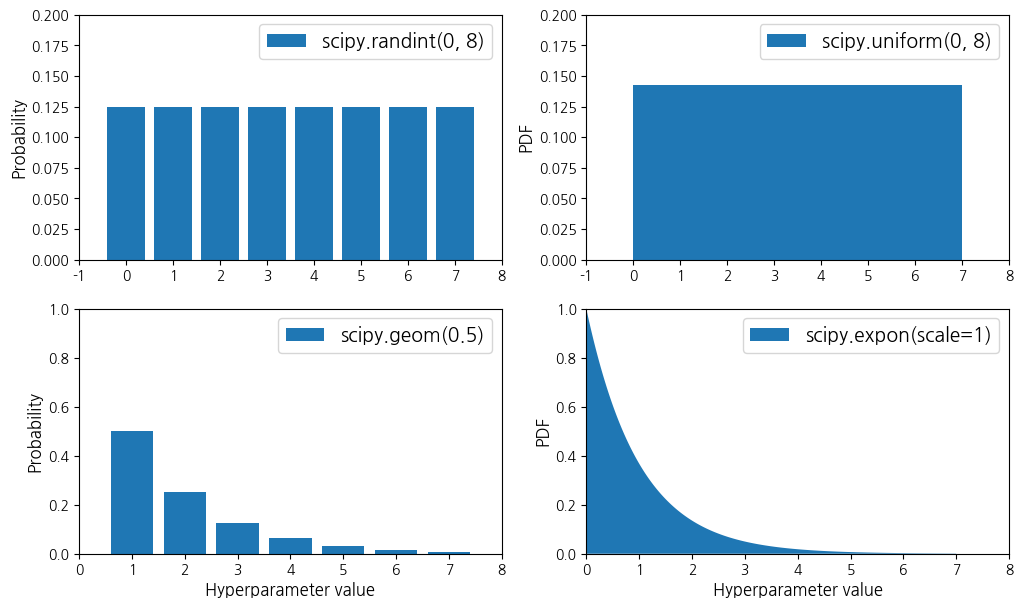

In [ ]:
# 정수, 균등분포
## max_depth, n_neighbors
xs1 = np.arange(0, 7 + 1) # 정수 추출 arrange, randint
randint_distrib = randint(0, 7 + 1).pmf(xs1) # pmf = probabilty mass function 확률 질량 함수

# 실수, 균등분포
## learning_rate, dropout_rate
xs2 = np.linspace(0, 7, 500) # 실수 추출 linspace, uniform
uniform_distrib = uniform(0, 7).pdf(xs2) # pdf = probability density function 확률 밀도 함수

# 정수, 작을수록 자주
## n_estimators, max_iter
xs3 = np.arange(0, 7 + 1) 
geom_distrib = geom(0.5).pmf(xs3) # geom = geometric 기하분포

# 실수, 작을수록 자주
## alpha, lambda
xs4 = np.linspace(0, 7, 500)
expon_distrib = expon(scale=1).pdf(xs4) # expon = exponential 지수분포


plt.figure(figsize=(12, 7))

plt.subplot(2, 2, 1)
plt.bar(xs1, randint_distrib, label="scipy.randint(0, 8)")
plt.ylabel("Probability")
plt.legend()
plt.axis([-1, 8, 0, 0.2])

plt.subplot(2, 2, 2)
plt.fill_between(xs2, uniform_distrib, label="scipy.uniform(0, 8)")
plt.ylabel("PDF")
plt.legend()
plt.axis([-1, 8, 0, 0.2])

plt.subplot(2, 2, 3)
plt.bar(xs3, geom_distrib, label="scipy.geom(0.5)")
plt.xlabel("Hyperparameter value")
plt.ylabel("Probability")
plt.legend()
plt.axis([0, 8, 0, 1])

plt.subplot(2, 2, 4)
plt.fill_between(xs4, expon_distrib, label="scipy.expon(scale=1)")
plt.xlabel("Hyperparameter value")
plt.ylabel("PDF")
plt.legend()
plt.axis([0, 8, 0, 1])

plt.show()

### 최상의 모델과 오차 분석

In [173]:
rnd_search.best_estimator_

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('groupimputer',
                                                                   GroupImputer(group_col='읍면동명')),
                                                                  ('standardize',
                                                                   StandardScaler())]),
                                                  ['건물면적', '층', '건축년도', '경도',
                                                   '위도', '월평균소득', '동별세대수',
                                                   '20세이상인구', '읍면동명']),
                                                 ('cat',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['읍면동명'])])),
                ('random_forest',
                 RandomForestRegressor(max_features=16, random_state=42))])

In [169]:
final_model = rnd_search.best_estimator_
feature_importances = final_model["random_forest"].feature_importances_
feature_importances.round(2)

array([0.14, 0.08, 0.17, 0.13, 0.11, 0.06, 0.06, 0.07, 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.01, 0.  , 0.  , 0.  , 0.01, 0.  , 0.  , 0.  , 0.  , 0.01, 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.

In [170]:
sorted(zip(feature_importances, final_model["preprocessing"].get_feature_names_out()),
       reverse=True)

[(0.16746986488347423, 'num__건축년도'),
 (0.1434534098403128, 'num__건물면적'),
 (0.12590107501469153, 'num__경도'),
 (0.11412657003378501, 'num__위도'),
 (0.0796336565551118, 'num__층'),
 (0.06931027327290396, 'num__20세이상인구'),
 (0.06139414379396349, 'num__월평균소득'),
 (0.055901846979844225, 'num__동별세대수'),
 (0.011802905768908533, 'cat__읍면동명_자양제1동'),
 (0.009828679685286343, 'cat__읍면동명_전농제1동'),
 (0.008964448475541238, 'cat__읍면동명_고덕제1동'),
 (0.007177076449975431, 'cat__읍면동명_화곡제1동'),
 (0.005855478139120685, 'cat__읍면동명_월곡제2동'),
 (0.004749772923504029, 'cat__읍면동명_상도제1동'),
 (0.004164906765164607, 'cat__읍면동명_삼전동'),
 (0.004021077497696825, 'cat__읍면동명_사근동'),
 (0.003969111307853888, 'cat__읍면동명_삼양동'),
 (0.003943563885608562, 'cat__읍면동명_영등포본동'),
 (0.0036350301317733956, 'cat__읍면동명_수유1동'),
 (0.00329676529885983, 'cat__읍면동명_아현동'),
 (0.003238448909401833, 'cat__읍면동명_신월1동'),
 (0.003147305854403234, 'cat__읍면동명_역삼1동'),
 (0.0028815534082127186, 'cat__읍면동명_방학제1동'),
 (0.0028477241457974044, 'cat__읍면동명_노량진제1동'),
 (0.0028393

### 테스트 세트로 시스템 평가하기

In [178]:
strat_test_set.head(1)

,자치구명,읍면동명,건물면적,토지면적,층,건축년도,경도,위도,월평균소득,동별세대수,동별세대당인구,20세미만인구,20세이상인구,주택가격(만원),income_cat
228,강서구,화곡제1동,56.12,32.0,4.0,1998.0,126.846287,37.544987,2485455.0,27977,1.78,20096,189853,18200,2


In [181]:
X_test = strat_test_set.drop('주택가격(만원)', axis=1)
y_test = strat_test_set['주택가격(만원)'].copy()

final_predictions = final_model.predict(X_test)

# final_rmse = mean_squared_error(y_test, final_predictions, squared=False)
final_rmse = np.sqrt(mean_squared_error(y_test, final_predictions))
print(final_rmse)

7839.29824544605


In [182]:
from scipy import stats

confidence = 0.95
squared_errors = (final_predictions - y_test) ** 2
np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1,
                         loc=squared_errors.mean(),
                         scale=stats.sem(squared_errors)))


array([6248.88514734, 9157.54488809])

In [183]:
m  = len(squared_errors)
mean = squared_errors.mean()
tscore = stats.t.ppf((1+confidence)/2, df=m-1)
tmargin = tscore * squared_errors.std(ddof=1)/np.sqrt(m)
np.sqrt(mean - tmargin), np.sqrt(mean + tmargin)

(6248.885147343089, 9157.544888092112)

In [184]:
zscore = stats.norm.ppf((1+confidence) / 2)
zmargin = zscore * squared_errors.std(ddof=1) / np.sqrt(m)
np.sqrt(mean - zmargin), np.sqrt(mean + zmargin)

(6257.807783060141, 9151.449924049137)

### joblib를 사용한 모델 저장

In [186]:
import joblib

joblib.dump(final_model, "my_seoul_housing_model.pkl")

['my_seoul_housing_model.pkl']

In [190]:
## 제품 환경에서 실행하기 위한 스크립트
import joblib

# from sklearn.cluster import Kmeans
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.metrics.pairwise import rbf_kernel

def column_ratio(X):
    return X[:, [0]] / X[:, [1]]

final_model_reloaded = joblib.load("my_seoul_housing_model.pkl")

new_data = housing.iloc[:5] # 새로운 데이터라 가정
predictions = final_model_reloaded.predict(new_data)

In [191]:
predictions

array([20497.5, 32246. , 28795.7, 19542. , 29049. ])